In [16]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import logging

import networkx as nx
import dowhy
from dowhy import CausalModel
import dowhy.datasets
import pickle
import econml
import warnings
warnings.filterwarnings('ignore')
import random 

seed = 42
np.random.seed(seed)
random.seed(seed)

BETA = 10

data = dowhy.datasets.linear_dataset(BETA, num_common_causes=1, num_samples=1000,num_frontdoor_variables=1,
                                    num_instruments=0, num_effect_modifiers=0,
                                     num_treatments=1,
                                    treatment_is_binary=False,
                                    num_discrete_common_causes=0,
                                    num_discrete_effect_modifiers=0,
                                    one_hot_encode=False)
df = data['df']

# w0에 종속적인 X 변수를 추가합니다.
w0 = df['W0']
df['X1'] = 2 * w0 + np.random.normal(0, 0.1, size=len(df))
df['X2'] = 4 * w0 + np.random.normal(0, 0.1, size=len(df))
df['X3'] = 3 * w0 + np.random.normal(0, 0.1, size=len(df))
df['X4'] = 9 * w0 + np.random.normal(0, 0.1, size=len(df))
df = df.rename(columns={'FD0': 'T2', 'W0': 'Z', 'v0': 'T1', 'y': 'Y'})
# data['df'] = df

with open('synthetic_dowhy.pkl', 'wb') as f:
    pickle.dump(df, f)
    
print("Transformed DataFrame with X:")
print(df.head())

# # 기존 그래프를 NetworkX 그래프로 변환합니다.
# G = nx.DiGraph(nx.parse_gml(data['gml_graph']))

# # w0 -> X 관계를 그래프에 추가합니다.
# G.add_edge('W0', 'X1')
# G.add_edge('W0', 'X2')

# # 수정된 그래프를 GML 문자열로 변환합니다.
# new_gml_graph = nx.generate_gml(G)
# new_gml_graph_str = "\n".join(list(new_gml_graph))
# data['gml_graph'] = new_gml_graph_str

# 새로운 그래프로 모델을 생성합니다.
model = CausalModel(
    data=data["df"],
    treatment='FD0',  # 분석하려는 관계의 원인 변수
    outcome='y',  # 분석하려는 관계의 결과 변수
    graph=data["gml_graph"]
)

# model.view_model()

# from IPython.display import Image, display
# display(Image(filename="causal_model.png"))

# 1.7892
model = CausalModel(
    data=data["df"],
    treatment='FD0',  # 분석하려는 관계의 원인 변수
    outcome='y',  # 분석하려는 관계의 결과 변수
    graph=data["gml_graph"]
)
# 인과 효과를 식별합니다.
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

# 인과 효과를 추정합니다.
estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")
print("Causal Estimate is ", estimate.value)

# 모델 검증
refute_results = model.refute_estimate(identified_estimand, estimate, method_name="placebo_treatment_refuter")
print(refute_results)

# 5.4153
model = CausalModel(
    data=data["df"],
    treatment='v0',  # 분석하려는 관계의 원인 변수
    outcome='y',  # 분석하려는 관계의 결과 변수
    graph=data["gml_graph"]
)
# 인과 효과를 식별합니다.
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

# 인과 효과를 추정합니다.
estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")
print("Causal Estimate is ", estimate.value)

# 모델 검증
refute_results = model.refute_estimate(identified_estimand, estimate, method_name="placebo_treatment_refuter")
print(refute_results)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Transformed DataFrame with X:
          T2         Z        T1          Y        X1        X2        X3  \
0 -16.576865 -1.362800 -5.193393 -33.612404 -2.643577 -5.679777 -4.096778   
1   1.680928  0.067982  0.445185   3.202055  0.217695  0.193671  0.429351   
2  -2.803361  0.028122 -0.932035  -4.927890  0.151652  0.189125  0.064131   
3   7.548296  0.759596  2.159425  15.705196  1.641039  2.996993  2.260462   
4  -4.861273 -0.831798 -2.325610 -11.111259 -1.443394 -3.281112 -2.639585   

          X4  
0 -12.187797  
1   0.611094  
2   0.274763  
3   6.865926  
4  -7.445851  
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d            
──────(E[y|W0])
d[FD₀]         
Estimand assumption 1, Unconfoundedness: If U→{FD0} and U→y then P(y|FD0,W0,U) = P(y|FD0,W0)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Original DataFrame:
        FD0        W0        v0          y
0  0.372151  0.306364 -0.510429   1.726855
1  3.365241  0.738238 -0.129574   6.412706
2  1.298548 -0.837158  1.066943  -2.597376
3 -5.671034 -3.387040 -2.141145 -20.525877
4 -4.655736 -2.149534 -2.557249 -13.981175


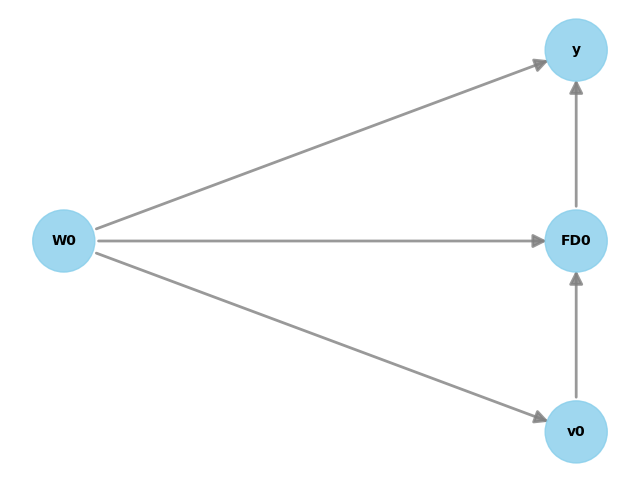

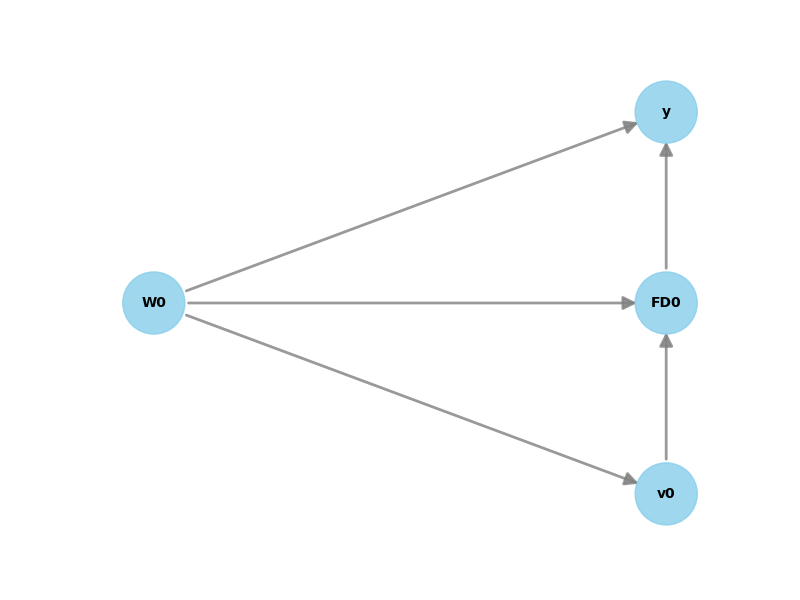

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import logging

import networkx as nx
import dowhy
from dowhy import CausalModel
import dowhy.datasets

import econml
import warnings
warnings.filterwarnings('ignore')

BETA = 10

data = dowhy.datasets.linear_dataset(BETA, num_common_causes=1, num_samples=10000,num_frontdoor_variables=1,
                                    num_instruments=0, num_effect_modifiers=0,
                                     num_treatments=1,
                                    treatment_is_binary=False,
                                    num_discrete_common_causes=0,
                                    num_discrete_effect_modifiers=0,
                                    one_hot_encode=False)
df = data['df']
print("Original DataFrame:")
print(df.head())


# 새로운 그래프로 모델을 생성합니다.
model = CausalModel(
    data=data["df"],
    treatment='FD0',  # 분석하려는 관계의 원인 변수
    outcome='y',  # 분석하려는 관계의 결과 변수
    graph=data["gml_graph"]
)

model.view_model()

from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [6]:
# 인과 효과를 식별합니다.
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

# 인과 효과를 추정합니다.
estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")
print("Causal Estimate is ", estimate.value)

# 모델 검증
refute_results = model.refute_estimate(identified_estimand, estimate, method_name="placebo_treatment_refuter")
print(refute_results)


Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d            
──────(E[y|W0])
d[FD₀]         
Estimand assumption 1, Unconfoundedness: If U→{FD0} and U→y then P(y|FD0,W0,U) = P(y|FD0,W0)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

Causal Estimate is  4.256847777987609
Refute: Use a Placebo Treatment
Estimated effect:4.256847777987609
New effect:0.0
p value:1.0



In [5]:
import numpy as np
import pandas as pd
import logging

import dowhy
from dowhy import CausalModel
import dowhy.datasets

import econml
import warnings
warnings.filterwarnings('ignore')

BETA = 10

# DoWhy를 사용하여 데이터 생성
data = dowhy.datasets.linear_dataset(
    beta=BETA,
    num_common_causes=4,
    num_samples=10000,
    num_instruments=2,
    num_effect_modifiers=2,
    num_treatments=1,
    treatment_is_binary=False,
    num_discrete_common_causes=2,
    num_discrete_effect_modifiers=0,
    one_hot_encode=False
)

df = data['df']

# 기존 데이터셋을 출력
print(df.head())
print("True causal estimate is", data["ate"])

# 데이터셋 변형
# T1, T2를 Z와 Y와 연결
# 여기서는 X는 무시하고 T1과 T2로 대체
Z = df[['W0', 'W1', 'W2', 'W3']]
T1 = Z['W0'] + Z['W1'] + np.random.normal(0, 1, size=len(df))
T2 = T1 + Z['W2'] + np.random.normal(0, 1, size=len(df))
Y = BETA * T2 + Z['W3'] + np.random.normal(0, 1, size=len(df))

# 변형된 데이터프레임 생성
df_transformed = pd.DataFrame({
    'Z0': Z['W0'],
    'Z1': Z['W1'],
    'Z2': Z['W2'],
    'Z3': Z['W3'],
    'T1': T1,
    'T2': T2,
    'Y': Y
})

print(df_transformed.head())

# DoWhy를 사용하여 SCM 정의
model = CausalModel(
    data=df_transformed,
    treatment=['T1', 'T2'],
    outcome='Y',
    graph="digraph {Z0 -> T1; Z1 -> T1; Z2 -> T2; Z3 -> Y; T1 -> T2; T2 -> Y}"
)

# 모델의 그래프 시각화
model.view_model()

# DoWhy를 사용하여 인과 추론 수행
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")
print("Causal Estimate is ", estimate.value)

# 모델 검증
refute_results = model.refute_estimate(identified_estimand, estimate, method_name="placebo_treatment_refuter")
print(refute_results)


         X0        X1   Z0        Z1        W0        W1 W2 W3         v0  \
0 -0.343704  1.109438  1.0  0.726998 -0.727119 -0.631718  1  0  18.604604   
1  0.479997  0.759405  0.0  0.820843  0.053309  0.335354  3  2  26.426019   
2  1.076488  1.238342  0.0  0.113396 -0.543821 -0.311856  0  3   7.976311   
3 -1.160638  0.164934  1.0  0.623403  0.647430 -0.485036  0  2  23.788680   
4 -0.848556 -0.459125  0.0  0.043117 -0.453775  0.476357  2  1  10.736117   

            y  
0  187.148873  
1  302.460845  
2  102.130359  
3  217.195829  
4   99.824328  
True causal estimate is 10.43059997836694


TypeError: Object with dtype category cannot perform the numpy op add